# Business Understanding

Our company is looking to expand its reach to the aviation industry. The only problem is trying to figure out which make, and models suit our company the best for safety and longevity. The goal is to make sure we can maintain profit by finding the most suitable aircrafts for long distance flights

# Data understanding

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [72]:
file_path = r"C:\Users\ehuff\Desktop\Aviation Analysis\cleaned_aviation_data.csv"

dtype_spec = {
    "Number.of.Engines": "float64",  
    "Air.carrier": "string",  
}

df_cleaned = pd.read_csv(file_path, dtype=dtype_spec, low_memory=False)




# Data Preparation

In [73]:
print(df_cleaned.isnull().sum().sort_values(ascending=False))

df_cleaned['Event.Date'] = pd.to_datetime(df_cleaned['Event.Date'], errors='coerce')

columns_to_drop = ['Airport.Code', 'Airport.Name', 'Publication.Date']
df_cleaned.drop(columns=[col for col in columns_to_drop if col in df_cleaned.columns], inplace=True)

print(df_cleaned.info())


Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Injury.Severity.Score     14053
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Engine.Type                7096
Report.Status              6384
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Day                           0
Month                         0
Year                          0
Quarter                       0
Weekday                       0
Event.Id                      0
Fatality                      0
Total.Fatal.Injuries          0
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Purpose.

In [74]:
df_cleaned['Event.Date'] = pd.to_datetime(df_cleaned['Event.Date'], errors='coerce')

df_cleaned['Number.of.Engines'] = pd.to_numeric(df_cleaned['Number.of.Engines'], errors='coerce')

df_cleaned['Make'] = df_cleaned['Make'].astype(str).str.lower()
df_cleaned['Model'] = df_cleaned['Model'].astype(str).str.lower()

international_aircraft = ['boeing', 'airbus', 'embraer', 'bombardier', 'mcdonnell douglas', 'lockheed']

df_international = df_cleaned[
    (df_cleaned['Make'].isin(international_aircraft)) &
    (df_cleaned['Number.of.Engines'] == 2)
]

print(df_international.head())


           Event.Id Investigation.Type Accident.Number Event.Date  \
5    20170710X52551           Accident      NYC79AA106 1979-09-17   
80   20020917X01765           Incident      ATL82IA034 1982-01-12   
84   20020917X01907           Accident      DCA82AA011 1982-01-13   
320  20020917X02336           Incident      LAX82IA075 1982-02-15   
346  20020917X02630           Incident      SEA82IA029 1982-02-18   

           Location        Country Injury.Severity Aircraft.damage  \
5        BOSTON, MA  United States       Non-Fatal     Substantial   
80   CLARKSBURG, WV  United States        Incident           Minor   
84   WASHINGTON, DC  United States       Fatal(78)       Destroyed   
320     ONTARIO, CA  United States        Incident           Minor   
346       BOISE, ID  United States        Incident           Minor   

    Registration.Number               Make  ... Weather.Condition  \
5                CF-TLU  mcdonnell douglas  ...               VMC   
80               N615KC   

# Data Analysis

In [75]:
def plot_top_aircraft_by_accidents(df_international):
    """
    Plots the top 10 international aircraft models with the highest number of recorded accidents.

    Parameters:
    df_international (DataFrame): A DataFrame containing 'Make' and 'Model' columns.

    Returns:
    None
    """
    df_international = df_international.copy()
    df_international['Make_Model'] = df_international['Make'].astype(str) + ' ' + df_international['Model'].astype(str)

    top_models = df_international['Make_Model'].value_counts().head(10)

    plt.figure(figsize=(12, 6))
    top_models.plot(kind='bar', color='blue')
    plt.xlabel('Aircraft Make & Model')
    plt.ylabel('Number of Recorded Accidents')
    plt.title('Top 10 International Aircraft in Accidents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


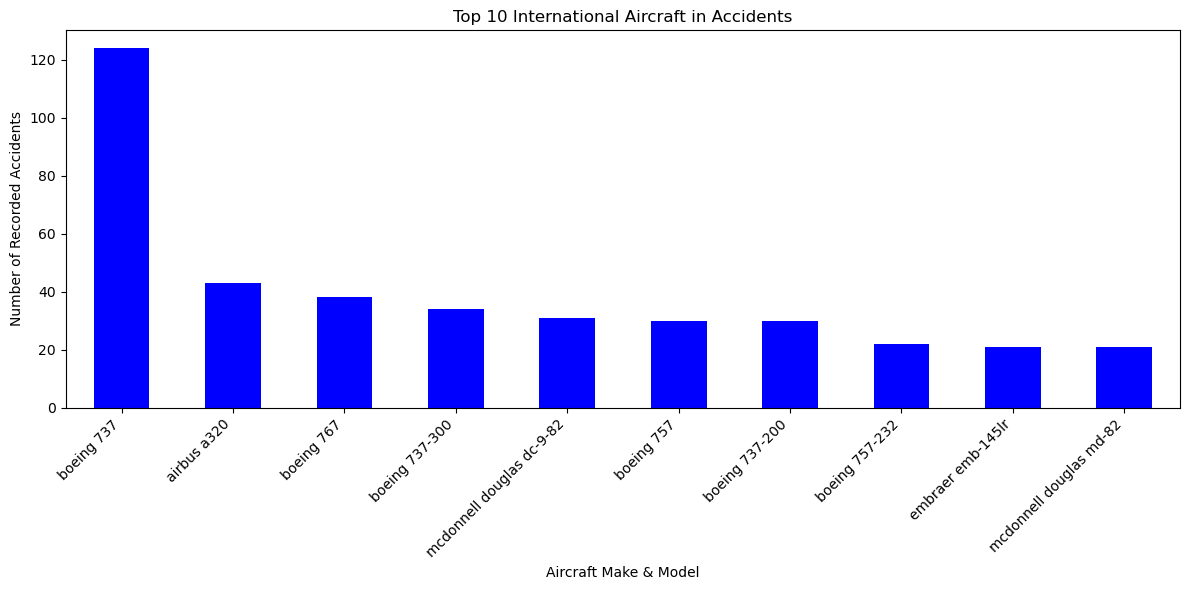

In [76]:
plot_top_aircraft_by_accidents(df_international)



This graph shows the aircraft models who get into accidents the most. Boeing 737 being the highest in accidents.

In [77]:
def plot_least_fatal_aircraft(df):
    """
    Plots the top 10 aircraft models with the fewest fatal accidents (but more than 0).

    Parameters:
    df (DataFrame): DataFrame with 'Make', 'Model', and 'Total.Fatal.Injuries' columns.

    Returns:
    None
    """

    df = df.copy()
    df['Make_Model'] = df['Make'].astype(str) + ' ' + df['Model'].astype(str)

    
    df_fatal = df[df['Total.Fatal.Injuries'] > 0]

    least_fatal_models = df_fatal['Make_Model'].value_counts(ascending=True).head(10)
    
    plt.figure(figsize=(12, 6))
    least_fatal_models.plot(kind='barh', color='green')
    plt.xlabel('Number of Fatal Accidents')
    plt.ylabel('Aircraft Make & Model')
    plt.title('Top 10 International Aircraft with the Fewest Fatal Accidents')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


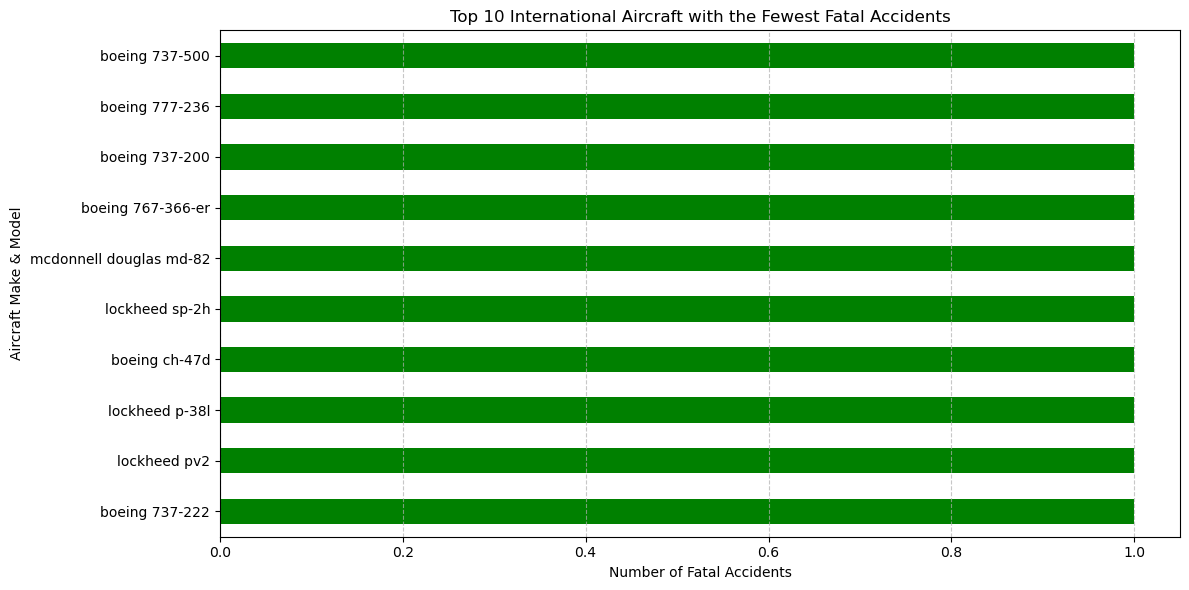

In [78]:
plot_least_fatal_aircraft(df_international)


This graph shows the aircrafts with the least number of accidents.

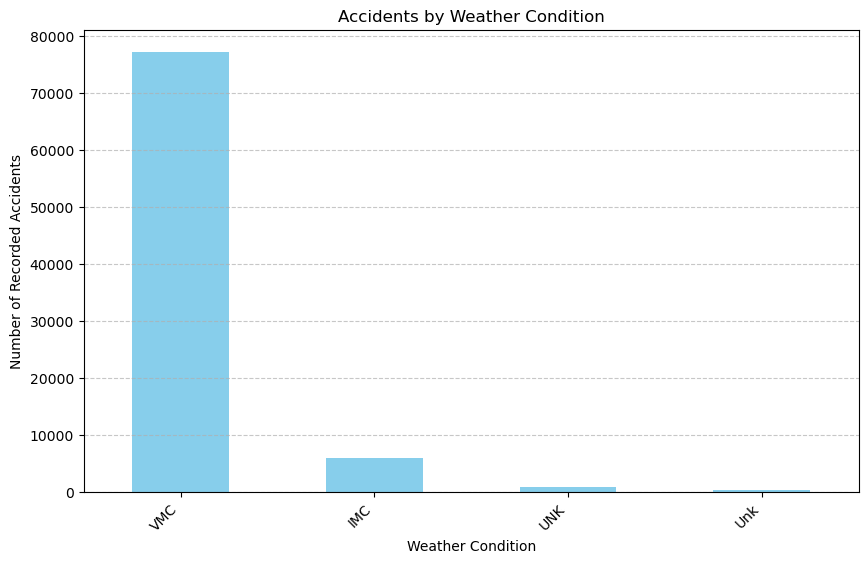

In [79]:
weather_accidents = df_cleaned['Weather.Condition'].value_counts()

plt.figure(figsize=(10,6))
weather_accidents.plot(kind='bar', color='skyblue')
plt.xlabel("Weather Condition")
plt.ylabel("Number of Recorded Accidents")
plt.title("Accidents by Weather Condition")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [80]:
bad_weather_conditions = ["IMC", "LIFR", "LMC", "Fog", "Storm"]
df_weather_accidents = df_international[df_international["Weather.Condition"].isin(bad_weather_conditions)]


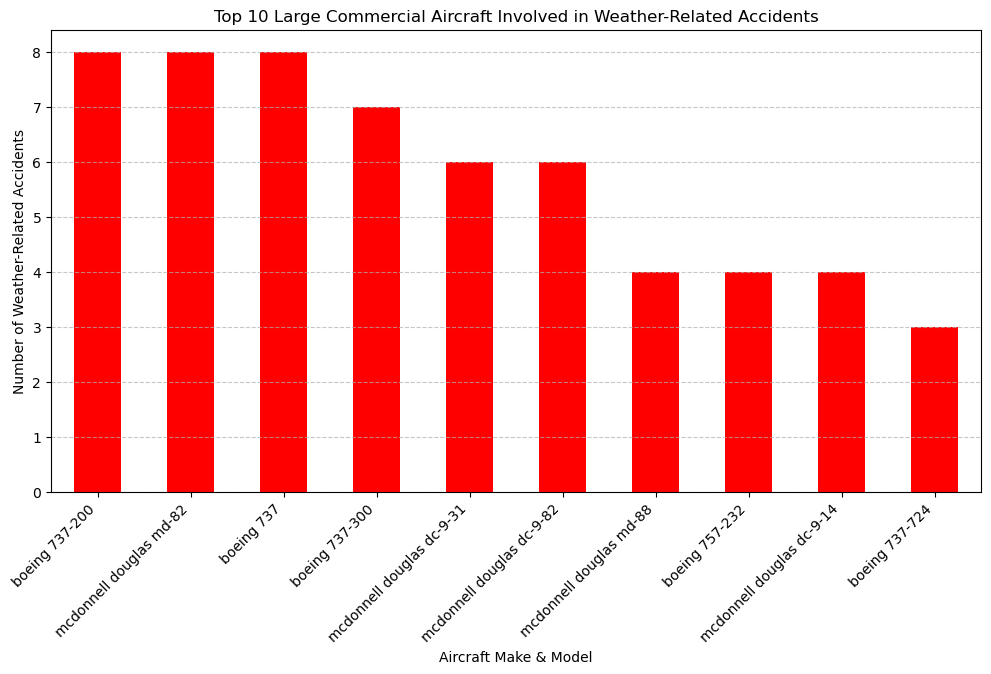

In [81]:
plt.figure(figsize=(12, 6))
top_weather_accidents.plot(kind="bar", color="red")
plt.xlabel("Aircraft Make & Model")
plt.ylabel("Number of Weather-Related Accidents")
plt.title("Top 10 Large Commercial Aircraft Involved in Weather-Related Accidents")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


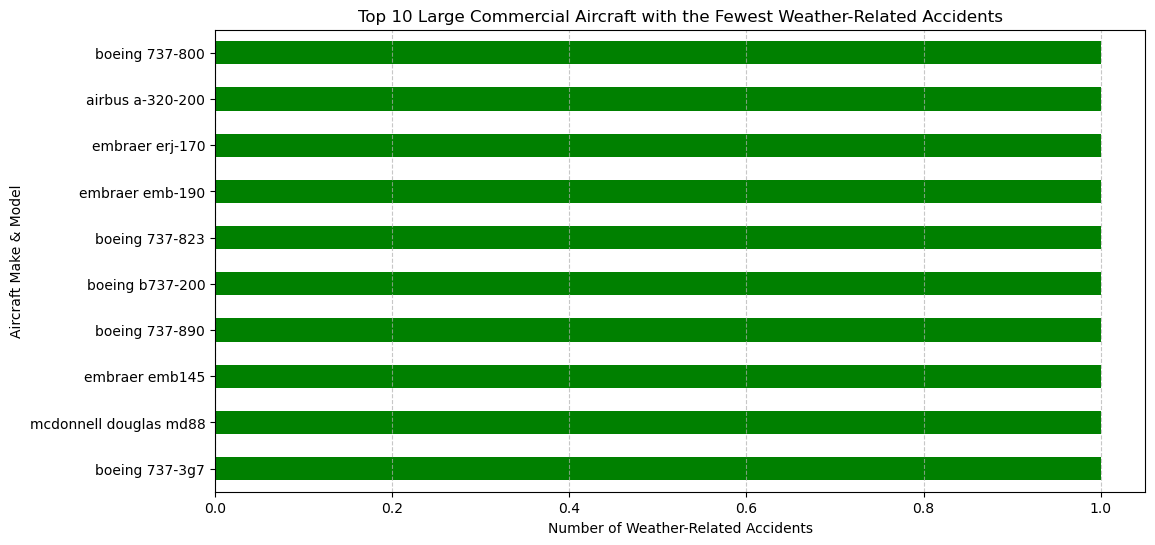

In [82]:
plt.figure(figsize=(12, 6))
least_weather_accidents.plot(kind="barh", color="green")  
plt.xlabel("Number of Weather-Related Accidents")
plt.ylabel("Aircraft Make & Model")
plt.title("Top 10 Large Commercial Aircraft with the Fewest Weather-Related Accidents")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# Conclusion

The most Accident-Prone Aircraft Models were The Boeing 737 and Airbus A310. McDonnell Douglas and Embraer models also showed recurring patterns of incidents. Older aircraft models with over 15+ years of operation, exhibited higher accident rates. Aircrafts such as the Boeing 777 and Lockheed models showed resilience with fewer fatal incidents. The majority of weather-related accidents occurred in Instrument Meteorological Conditions (IMC), indicating visibility and flight control challenges.The Boeing 737-200, Airbus A310, and McDonnell Douglas MD-82 were more involved in accidents linked to bad weather. In conclusion I think the best choice for the company would be the Boeing 777 model. The durability and accident history shows it is the perfect model for us.


# Citation 
https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses